In [78]:
import pandas as pd
import numpy as np
df=pd.read_csv("../collapsed_datasets/dataset_peaks_2.csv").drop("Unnamed: 0", axis=1)
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features
non_corr_df=df.drop(to_drop, axis=1)

X=non_corr_df.drop("class", axis=1)
y=non_corr_df["class"]

C:\Users\marco\AppData\Local\Temp\ipykernel_28716\919984832.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()
C:\Users\marco\AppData\Local\Temp\ipykernel_28716\919984832.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [79]:
# in questo notebook andremo a cercare il miglior classificatore

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, f1_score, recall_score, precision_score, accuracy_score


knn_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=8)),
    ("classifier", KNeighborsClassifier(n_neighbors=5))
])

res=cross_validate(knn_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

knn_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}
print(knn_results)

{'precision': 0.9084086673413676, 'recall': 0.9056518002487286, 'f1': 0.9060203199065366}


In [80]:
from sklearn.svm import SVC
SVC_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=8)),
    ("classifier", SVC())
])

res=cross_validate(SVC_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

SVC_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(SVC_results)

{'precision': 0.828469012416547, 'recall': 0.7809287888132819, 'f1': 0.7493959021557892}


In [81]:
from sklearn.tree import DecisionTreeClassifier
tree_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=8)),
    ("classifier", DecisionTreeClassifier())
])

res=cross_validate(tree_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

tree_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(tree_results)

{'precision': 0.9125374452630943, 'recall': 0.9114870125274258, 'f1': 0.9116845920820928}


In [82]:
from sklearn.ensemble import RandomForestClassifier
ranfor_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=8)),
    ("classifier", RandomForestClassifier())
])

res=cross_validate(ranfor_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted"),
    'accuracy':make_scorer(accuracy_score)
}, cv=KFold(5, shuffle=True, random_state=12))

ranfor_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(ranfor_results)


{'precision': 0.945724601881526, 'recall': 0.9452841673154504, 'f1': 0.9453136891333326}


In [83]:
from sklearn.linear_model import LogisticRegression
logregr_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=8)),
    ("classifier", LogisticRegression(max_iter=1000))
])

res=cross_validate(logregr_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

logregr_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(logregr_results)

{'precision': 0.8806577415936582, 'recall': 0.8710538608535636, 'f1': 0.8694585261441418}


In [84]:
from sklearn.naive_bayes import GaussianNB
nb_pipe=Pipeline([
    ("scaler", RobustScaler()),
    ("sampling", SMOTE()),
    ("feature-selector", SelectKBest(k=8)),
    ("classifier", GaussianNB())
])

res=cross_validate(nb_pipe, X, y, scoring={
    'precision': make_scorer(precision_score, average="weighted"),
    'recall': make_scorer(recall_score, average="weighted"),
    'f1score':make_scorer(f1_score, average="weighted")
}, cv=KFold(5, shuffle=True))

nb_results={'precision': res['test_precision'].mean(), 'recall': res["test_recall"].mean(), "f1":res['test_f1score'].mean()}

print(nb_results)

{'precision': 0.814505001639547, 'recall': 0.7809289910316168, 'f1': 0.774818540438525}


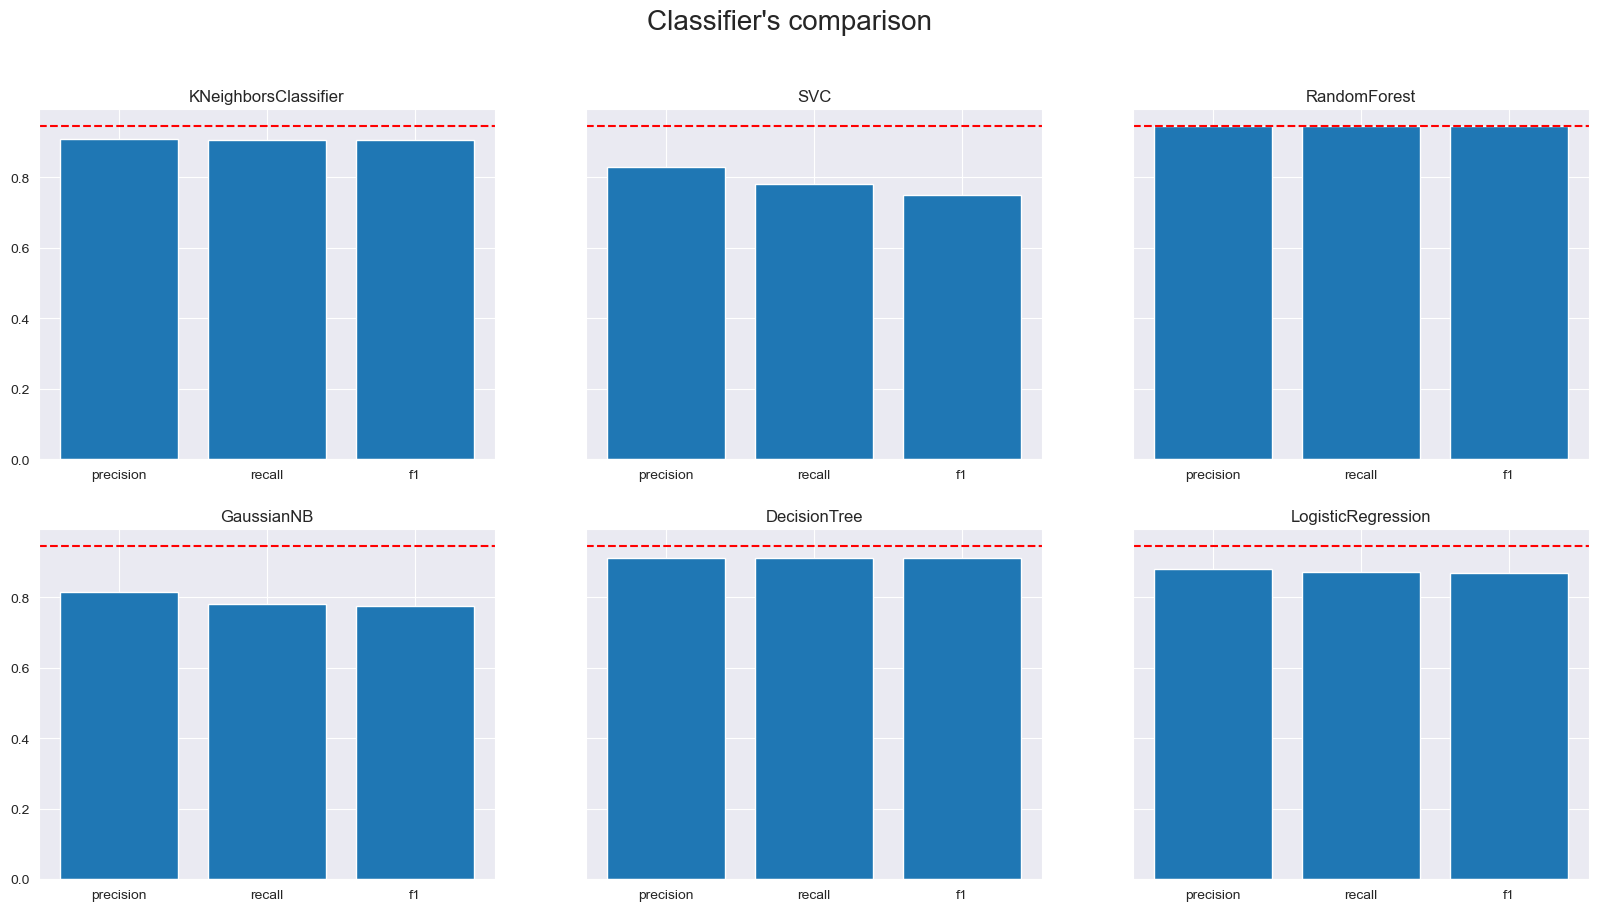

In [86]:
from matplotlib import pyplot as plt
f,axes=plt.subplots(2,3,figsize=(20,10), sharey=True)
f.suptitle("Classifier's comparison", fontsize=20)
h_max=np.max(list(ranfor_results.values()))
axes[0][0].bar(knn_results.keys(), knn_results.values())
axes[0][0].axhline(y = h_max, color = 'r', linestyle = 'dashed')
axes[0][0].title.set_text("KNeighborsClassifier")
axes[0][1].bar(SVC_results.keys(), SVC_results.values())
axes[0][1].axhline(y = h_max, color = 'r', linestyle = 'dashed')
axes[0][1].title.set_text("SVC")
axes[0][2].bar(ranfor_results.keys(), ranfor_results.values())
axes[0][2].axhline(y = h_max, color = 'r', linestyle = 'dashed')
axes[0][2].title.set_text("RandomForest")
axes[1][0].bar(nb_results.keys(), nb_results.values())
axes[1][0].axhline(y = h_max, color = 'r', linestyle = 'dashed')
axes[1][0].title.set_text("GaussianNB")
axes[1][1].bar(tree_results.keys(), tree_results.values())
axes[1][1].axhline(y = h_max, color = 'r', linestyle = 'dashed')
axes[1][1].title.set_text("DecisionTree")
axes[1][2].bar(logregr_results.keys(), logregr_results.values())
axes[1][2].axhline(y = h_max, color = 'r', linestyle = 'dashed')
axes[1][2].title.set_text("LogisticRegression")